# Group 32 Final Project

* Group members:

### Preparation

Load libraries and dataset.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# Load data as Data Frame - unicode_escape
df = pd.read_csv("News Sentiment Analysis for Stock Data by Company.csv", encoding="latin-1")

## Quick View of the Data Set

Whether there is empty data in our data set.

In [3]:
df

,Label,Ticker,Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...
1,1,A,@TotesTravel : American United call off Hong K...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...
3,1,A,@TotesTravel : American Airlines reaches deal ...
4,1,A,@TotesTravel : US airlines Treasury Department...
...,...,...,...
15557,0,WMT,Walmart dumps e-cigarettes: Largest store in U...
15558,0,WMT,Walmart makes a $16 billion bet on India's boo...
15559,0,WMT,Walmart raises minimum age to buy tobacco to 2...
15560,0,WMT,Walmart Took Over Chile In Only Three Years An...


In [4]:
for column in df:
    print("The column", column, "has", df[column].isnull().sum(), "empty data.")

The column Label has 0 empty data.
The column Ticker has 0 empty data.
The column Headline has 0 empty data.


## Quick Visualization

* 0 -> The stock went down by market close the day the article was published (negative)
* 1 -> The stock went up by market close the day the article was published (positive)
* 2 -> The stock stayed the same by market close the day the article was published (neutral)

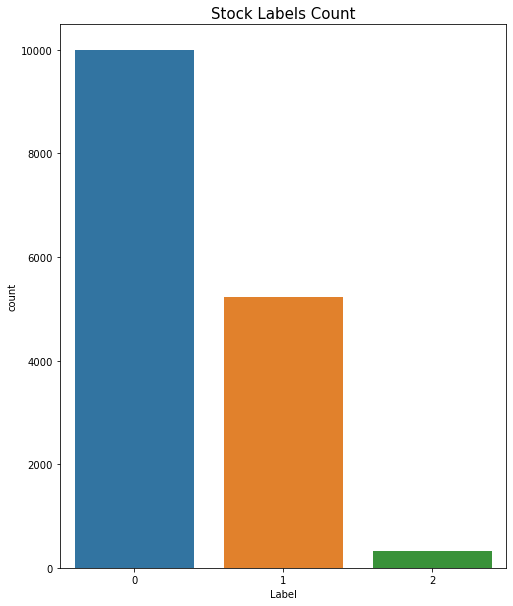

In [5]:
plt.figure(figsize=(8, 10))
sns.countplot(x=df['Label'])
plt.title("Stock Labels Count", fontsize=15)
plt.show()

## Preprocess Headlines

Clean Headlines. Remove links, punctuations, stopwords and many other words that don’t give a lot of meanings. Lowercase the headlines. Perform stemming operation so that similar words are reduced.

Store the result in a list.

In [56]:
def clean_headline(headline):
    """
    Clean Headlines. Remove links, punctuations, stopwords and many other words that don’t give a lot of meanings. Lowercase the headlines. Perform stemming operation so that similar words are reduced.

    Input:
        headline: A string of the headline.
    Output:
        tokens: a list of words containing the processed headline.

    """

    # remove links (use 'r' to represent raw strings)
    headline = re.sub(r'(https?://)?(www\.)?\S*\.\S*\s*', ' ', headline).strip()
    # remove punctuations using regular expression, and convert letters to lowercase
    headline = re.sub(r'[^\w\s]', '', headline).lower()
    # tokenization
    tokens = word_tokenize(headline)
    # remove stopwords
    sw = stopwords.words("english")
    tokens = [t for t in tokens if t not in sw]
    # stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens]
    # lemmatization
    #wnl = nltk.WordNetLemmatizer()
    #tokens = [wnl.lemmatize(t) for t in tokens]

    return tokens

In [58]:
# Use a list to store separate words of cleaned headlines
cleaned_headlines = []

# Add cleaned headlines to data frame as strings.
for i in range(len(df)):
    tokens = clean_headline(df.loc[i, "Headline"])
    df.loc[i, 'Cleaned_Headline'] = " ".join(tokens)
    cleaned_headlines.append(tokens)

In [59]:
# Display the cleaned headlines
df

,Label,Ticker,Headline,Cleaned_Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...,totestravel airlin share tumbl new york impos ...
1,1,A,@TotesTravel : American United call off Hong K...,totestravel american unit call hong kong fligh...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...,totestravel airlin stock hit highest price sin...
3,1,A,@TotesTravel : American Airlines reaches deal ...,totestravel american airlin reach deal boe 737...
4,1,A,@TotesTravel : US airlines Treasury Department...,totestravel us airlin treasuri depart reach ag...
...,...,...,...,...
15557,0,WMT,Walmart dumps e-cigarettes: Largest store in U...,walmart dump ecigarett largest store us longer...
15558,0,WMT,Walmart makes a $16 billion bet on India's boo...,walmart make 16 billion bet india boom economi
15559,0,WMT,Walmart raises minimum age to buy tobacco to 2...,walmart rais minimum age buy tobacco 21 pressu...
15560,0,WMT,Walmart Took Over Chile In Only Three Years An...,walmart took chile three year countri terrifi ...


## Convert Word to Vector

In [9]:
import gensim
from sklearn.model_selection import train_test_split

In [10]:
# Train Word2Vec model
word2vec_model = gensim.models.Word2Vec(cleaned_headlines, vector_size=200)
# word2vec_model = gensim.models.Word2Vec(cleaned_headlines)

In [11]:
word2vec_model.wv['iraq']

array([-3.68495728e-03, -1.42711788e-01, -1.43880965e-02, -6.89845011e-02,
        2.21842438e-01, -1.15926154e-01, -8.00349377e-03,  2.03734294e-01,
        6.14172854e-02,  2.70389114e-02,  2.32552830e-03, -4.10661846e-02,
       -1.51810601e-01,  2.50985492e-02, -6.49104938e-02, -2.56144032e-02,
       -1.75216302e-01, -6.59987926e-02,  7.22930208e-02, -3.81687522e-01,
        2.54164319e-02, -2.60732751e-02,  5.10976464e-02,  9.24071893e-02,
        8.42153504e-02, -5.81790833e-03,  7.58136585e-02, -1.19651489e-01,
       -2.40196779e-01,  9.84637961e-02,  6.52850568e-02, -7.47301802e-02,
        1.91851556e-01, -1.71020970e-01,  7.43568838e-02,  1.94058493e-02,
        6.15511984e-02, -4.97203134e-02, -6.25456646e-02, -1.67156249e-01,
       -1.01968698e-01,  1.79721264e-03, -4.61149886e-02, -6.16561323e-02,
        4.12493259e-01, -2.19832495e-01,  4.42324579e-02, -3.89584415e-02,
        1.43746629e-01,  2.64958501e-01, -1.25876432e-02, -3.18423919e-02,
       -9.22328159e-02, -

In [12]:
# Convert words to vectors
word_vectors = []
cnt = 0
cnt_missed = 0

for headline in cleaned_headlines:
    headline_vec = []
    for word in headline:
        cnt += 1
        try:
            headline_vec.append(word2vec_model.wv[word])
        except:
            cnt_missed += 1
            # print(word, " Not in word vectors.")
    word_vectors.append(headline_vec)

In [13]:
print(cnt_missed / cnt, "of words are missed in the word vectors.")

0.10255385476199992 of words are missed in the word vectors.


## LSTM

### Prepare data set

In [369]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.legacy import data
import random

In [370]:
# Set random seed
seed = 1453
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [371]:
# Set data field
HEADLINE = data.Field(tokenize='spacy', batch_first=True, include_lengths=True)
LABEL = data.LabelField(dtype=torch.long, batch_first=True)
fields = [(None, None), ('label', LABEL), ('headline', HEADLINE)]

In [372]:
# Transfer Data Field
data_for_DataFieldTransfer = df[['Label', 'Cleaned_Headline']]

data_for_DataFieldTransfer.to_csv("./data_for_DataFieldTransfer.csv", index=True)

training_data = data.TabularDataset(path='./data_for_DataFieldTransfer.csv', format='csv', fields=fields,
                                    skip_header=True)

In [373]:
# View new data form example
print(vars(training_data.examples[0]))

{'label': '0', 'headline': ['totestravel', 'airlin', 'share', 'tumbl', 'new', 'york', 'impos', 'quarantin', 'florida', 'case', 'spike', 'american', 'airlin', 'group', 'plane', 'prepar', 'land', 'laguardia', 'airport', 'lga', 'new', 'york', 'tuesday', 'april', 'travelnewsinsight']}


In [374]:
# Prepare training and testing data set
train_data, valid_data = training_data.split(split_ratio=0.7, random_state=random.seed(seed))

# X_train, X_test, y_train, y_test = train_test_split(training_data, df['Label'], test_size=0.2, random_state=20)

In [375]:
# the words should have at least a min frequency of 2 to build its vocab
MIN_FREQ = 2

# Torch text builds the vocabulary based on word representations from glove.
HEADLINE.build_vocab(train_data,
                     min_freq=MIN_FREQ,
                     vectors="glove.6B.100d",
                     unk_init=torch.Tensor.normal_)

LABEL.build_vocab(valid_data)

#### Quick View

In [286]:
# Headline Vocabs
print("Size of HEADLINE vocabulary:", len(HEADLINE.vocab))

Size of HEADLINE vocabulary: 8761


In [287]:
# Label Vocabs
print("Size of LABEL vocabulary:", len(LABEL.vocab))

Size of LABEL vocabulary: 3


In [288]:
# Frequent words
print("Frequent words:", HEADLINE.vocab.freqs.most_common(10))

Frequent words: [('say', 655), ('new', 622), ('first', 568), ('us', 547), ('world', 523), ('compani', 501), ('china', 500), ('bank', 442), ('news', 433), ('trump', 411)]


In [289]:
# Vocab
print("Vocabs:", HEADLINE.vocab.stoi)

Vocabs: defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x000001F4D4845F70>>, {'<unk>': 0, '<pad>': 1, 'say': 2, 'new': 3, 'first': 4, 'us': 5, 'world': 6, 'compani': 7, 'china': 8, 'bank': 9, 'news': 10, 'trump': 11, 'amp': 12, 'market': 13, 'million': 14, 'corpor': 15, 'govern': 16, 'year': 17, 'countri': 18, 'use': 19, 'power': 20, 'group': 21, 'make': 22, 'system': 23, 'appl': 24, 'said': 25, 'global': 26, 'chines': 27, 'report': 28, 'time': 29, 'billion': 30, 'energi': 31, 'state': 32, 'one': 33, 'call': 34, 'inc': 35, 'ban': 36, 'peopl': 37, 'intern': 38, 'american': 39, 'game': 40, 'india': 41, 'oil': 42, 'uk': 43, 'korea': 44, 'australian': 45, 'googl': 46, 'popular': 47, 'discoveri': 48, 'plan': 49, 'facebook': 50, 'could': 51, 'nation': 52, 'servic': 53, 'nt': 54, 'secur': 55, 'court': 56, 'two': 57, 'vaccin': 58, 'presid': 59, 'deal': 60, 'get': 61, 'russian': 62, 'unit': 63, 'home': 64, 'polic': 65, 'alphabet': 66, 'farmer': 67, 'kill'

In [344]:
# If cuda available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set Batch Size
BATCH_SIZE = 128

# Load Iterator
train_iterator, valid_iterator = data.BucketIterator.splits(
    (train_data, valid_data),
    batch_size=BATCH_SIZE,
    sort_key=lambda x: len(x.headline),
    sort_within_batch=True,
    device=device)

### Build Bi-LSTM Model

In [354]:
class LSTMClassifier(nn.Module):
    def __init__(self,
                 vocab_size,
                 embedding_dim,
                 hidden_dim,
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
        # Initialize
        super().__init__()
        # Embedding
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # LSTM
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            bidirectional=bidirectional,
                            dropout=dropout,
                            batch_first=True)
        # Dense
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        # Act
        self.act = nn.Sigmoid()

    def forward(self, text, text_lengths):
        # text = [batch size,sent_length]
        embedded = self.embedding(text)
        # embedded = [batch size, sent_len, emb dim]
        # Pack padded sequence
        text_lengths_clamped = text_lengths.clamp(min=1)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths_clamped, batch_first=True)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        # hidden = [batch size, num layers * num directions,hid dim]
        # cell = [batch size, num layers * num directions,hid dim]
        # Concat forward and backward hidden states
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        # hidden = [batch size, hid dim * num directions]
        dense_outputs = self.fc(hidden)
        # Act
        outputs = self.act(dense_outputs)
        return outputs

In [355]:
# Hyper-parameters
input_dim = len(HEADLINE.vocab)
embedding_dim = 100
hidden_dim = 32
output_dim = len(LABEL.vocab)
num_layers = 2
bidirectional = True
dropout = 0.2

# LSTM Model
model = LSTMClassifier(input_dim,
                       embedding_dim,
                       hidden_dim,
                       output_dim,
                       num_layers,
                       bidirectional=bidirectional,
                       dropout=dropout)

In [356]:
print(model)

LSTMClassifier(
  (embedding): Embedding(8761, 100)
  (lstm): LSTM(100, 32, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=64, out_features=3, bias=True)
  (act): Sigmoid()
)


In [357]:
# Available training parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 935,687 trainable parameters


In [358]:
# initializing model weights for better convergence
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, std=0.1)


model.apply(init_weights)

# initializing model embeddings with glove word vectors
pretrained_embeddings = HEADLINE.vocab.vectors
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.7506,  0.4851,  0.2734,  ..., -0.5432, -1.2170, -0.9132],
        [ 0.6753, -1.2324,  1.5064,  ..., -0.8353, -0.6744, -0.3777],
        [-0.0917,  0.5810,  0.4048,  ..., -0.3874,  0.3469,  0.2290],
        ...,
        [-0.5216,  0.1743, -2.0595,  ...,  0.5951, -0.5365, -1.6560],
        [ 0.1367, -0.1832, -0.0628,  ...,  0.1960,  0.2462,  0.1169],
        [ 0.8142, -0.5310, -1.3423,  ..., -1.0447,  1.6454, -1.3680]])

### Set Optimizer

In [359]:
# Optimizer
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()


# Define accuracy
def categorical_accuracy(preds, y):
    # get the index of the max probability
    max_preds = preds.argmax(dim=1, keepdim=True)
    # correct = (max_preds == y).__float__()
    correct = (max_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc


# Convert to cuda if available
model = model.to(device)
criterion = criterion.to(device)

### Training Function

In [360]:
def train(model, iterator, optimizer, criterion):
    # Set model as train
    model.train()
    # Initialize each epoch
    epoch_loss = 0
    epoch_acc = 0
    for batch in iterator:
        # Reset optimizer with zero gradients for each iteration
        optimizer.zero_grad()
        # Convert to one dim tensor
        text, text_lengths = batch.headline
        predictions = model(text, text_lengths).squeeze()
        # Calculate loss
        loss = criterion(predictions, batch.label)
        # Calculate accuracy
        acc = categorical_accuracy(predictions, batch.label)
        # Calculate gradients
        loss.backward()
        # Update weights
        optimizer.step()
        # Calculate loss and acc
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

### Evaluating Function

In [361]:
def evaluate(model, iterator, criterion):
    # Stop dropout
    model.eval()
    # Initialize each epoch
    epoch_loss = 0
    epoch_acc = 0

    with torch.no_grad():
        for batch in iterator:
            # Convert to one dim tensor
            text, text_lengths = batch.headline
            predictions = model(text, text_lengths).squeeze()
            # Calculate loss and acc
            loss = criterion(predictions, batch.label)
            acc = categorical_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

### Train Bi-LSTM Model

In [387]:
N_EPOCHS = 5
best_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch + 1:02}\n')
    # Training
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    # Evaluating
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    # Save Model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc:.2f}%')

Epoch: 01

	Train Loss: 0.789 | Train Acc: 81.52%
	 Val. Loss: 0.849 | Val. Acc: 80.65%
Epoch: 02

	Train Loss: 0.769 | Train Acc: 81.25%
	 Val. Loss: 0.854 | Val. Acc: 80.41%
Epoch: 03

	Train Loss: 0.759 | Train Acc: 74.82%
	 Val. Loss: 0.844 | Val. Acc: 70.66%
Epoch: 04

	Train Loss: 0.744 | Train Acc: 67.98%
	 Val. Loss: 0.895 | Val. Acc: 63.85%
Epoch: 05

	Train Loss: 0.725 | Train Acc: 67.24%
	 Val. Loss: 0.872 | Val. Acc: 68.18%


### Predicting Function

In [408]:
# Load weights
path = './saved_weights.pt'
model.load_state_dict(torch.load(path))
model.eval()

import spacy

nlp = spacy.load("en_core_web_sm")


def predict(model, sentence):
    tokens = clean_headline(sentence)   #令牌化(tokenize)句子
    indexed = [HEADLINE.vocab.stoi[t] for t in tokens]  #转换为整数序列
    length = [len(indexed)]  #计算单词个数
    tensor = torch.LongTensor(indexed).to(device)  #转换为张量
    tensor = tensor.unsqueeze(1).T  #reshape成[batch, 单词个数]
    length_tensor = torch.LongTensor(length)  #转换为张量
    print(length_tensor)
    prediction = model(tensor, length_tensor)  #预测
    return prediction

In [411]:
pred = predict(model, "Stop Brexit petition tops 3m signatures")
pred

tensor([6])


tensor([[0.9882, 0.9961, 0.0011]], grad_fn=<SigmoidBackward>)

In [412]:
max_pred = pred.argmax(dim=1, keepdim=True)
max_pred

tensor([[1]])